In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport common

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Пример работы алгоритма

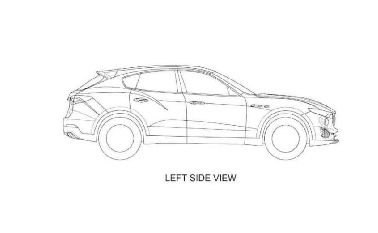

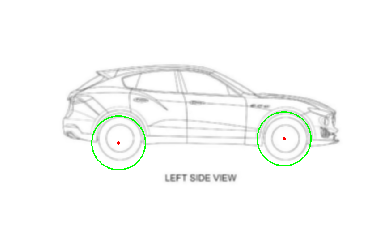

Car is here


In [6]:
common.test(5)

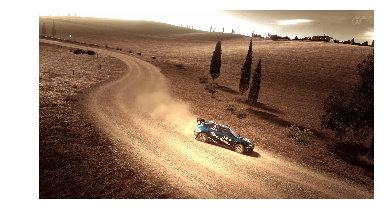

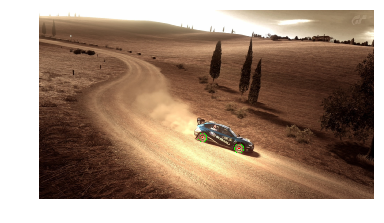

Car is here


In [7]:
common.test(32)

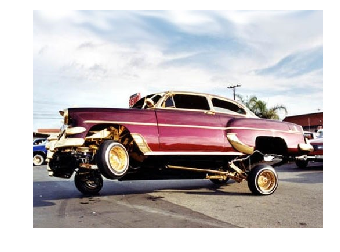

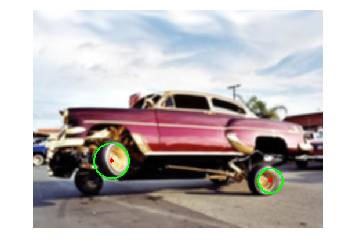

Car is here


In [5]:
common.test(11)

## Разбор алгоритма

Основой программы является фукнкция
`wheelDetector(img, min_Rad, max_Rad, accumulatorThreshold, minDistance, paramKenny)`, которая получает картинку, минимальный и максимальный радиусы, параметр для аккумулятора и параметр для метод Кенни. Возвращает изображение с нарисованными кругами(если получилось найти круги) и логическое значение(True - найдна машина на картинки, False - не найдена).

Изображение, полученное методом, преобразуется в полутоновое и передается в 
```python
cv2.HoughCircles(gimg, cv2.HOUGH_GRADIENT, 1, minDist=minDistance,
                               param1=paramKenny,
                               param2=accumulatorThreshold, minRadius=min_Rad, maxRadius=max_Rad)
```
где:
- `gmig` - 8-битное, одноканальное, полутоновое изображение;
- `cv2.HOUGH_GRADIENT` - метод обнаружения, в данный момент реализован только этот;
- `minDist` - минимально расстояние между центрами обнаруженных кругов;
- `param1` - параметр для метода Кенни;
- `param2` - попрог аккумулятора для центров окружностей. Чем меньше, тем больше ложных окружностей. Сначала будут возвращены круги, соответствующие большим 
	значениям аккумулятора;
- `minRadius` - минимальный радиус для обнаруженного круга;
- `maxRadius` - максимальный радиус для обнаруженного круга;
Возвращает вектор найденный кругов

Если среди найденных кругов есть пара, близкого радиуса, лежащая на достаточно большом расстоянии по x и близко по y, то мы считаем что это колеса машины и возвращаем True.

Для улучшения точности изображения сначала размывается: `bimg = cv2.blur(img, (5,5)))`, а затем передается в wheelDetector.

При попытке обнаружения машины, мы пробегаемся по param1, param2, начиная с высоких значений: 170 и 150 соответственно, и заканчивая на 70 и 40

Данный алгоритм показал точность 69% на наборе из 100 изображений. Чтобы получить лучший результат, необходимо использовать изображения одного качества и размера, чтобы более тонко настроить параметры.